In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, metrics
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [5]:
data_dir = '../input/new-plant-diseases-dataset/'
train_dir = os.path.join(data_dir, 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')
valid_dir = os.path.join(data_dir, 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid')


In [6]:
# Image preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=64, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(128, 128), batch_size=64, class_mode='categorical')


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [7]:
# Load VGG16 model with pre-trained weights
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classifier on top of VGG16
vgg_model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(38, activation='softmax')
])

# Compile VGG16 model
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train VGG16 model
vgg_history = vgg_model.fit(train_generator, epochs=10, validation_data=valid_generator)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-03-13 18:41:30.475374: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 3.5242, expected 3.06308
2024-03-13 18:41:30.475431: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 80: 3.59666, expected 3.13554
2024-03-13 18:41:30.475491: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12288: 3.0365, expected 2.57538
2024-03-13 18:41:30.475500: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12416: 3.21471, expected 2.75359
2024-03-13 18:41:30.475523: E external/local_xla/xla/service/gpu/buffer_comparato

   1/1099 ━━━━━━━━━━━━━━━━━━━━ 6:05:18 20s/step - accuracy: 0.0312 - loss: 3.9867

I0000 00:00:1710355302.345903     134 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710355302.368789     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1015/1099 ━━━━━━━━━━━━━━━━━━━━ 49s 586ms/step - accuracy: 0.7060 - loss: 0.9903

2024-03-13 18:51:37.116015: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98304: 3.42126, expected 2.83622
2024-03-13 18:51:37.116071: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98308: 4.3523, expected 3.76726
2024-03-13 18:51:37.116080: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98309: 4.09923, expected 3.51419
2024-03-13 18:51:37.116088: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98310: 4.14572, expected 3.56068
2024-03-13 18:51:37.116096: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98311: 3.89673, expected 3.31168
2024-03-13 18:51:37.116104: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98312: 3.05078, expected 2.46574
2024-03-13 18:51:37.116111: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98313: 3.26819, expected 2.68315
2024-03-13 18:51:37.116119: 

1098/1099 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.7137 - loss: 0.9634

W0000 00:00:1710355948.975165     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-03-13 18:55:08.036224: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.92505, expected 3.92836
2024-03-13 18:55:08.036303: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 8.0965, expected 7.0998
2024-03-13 18:55:08.036313: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.44021, expected 6.44351
2024-03-13 18:55:08.036321: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.12228, expected 6.12558
2024-03-13 18:55:08.036329: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.19707, expected 5.20038
2024-03-13 18:55:08.036336: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.83462, expected 4.83792
2024-03-13 18:55:08.036344: E external/local_xla/xla/service/gpu/bu

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 833s 740ms/step - accuracy: 0.7138 - loss: 0.9628 - val_accuracy: 0.8538 - val_loss: 0.7601
Epoch 2/10


W0000 00:00:1710356115.313075     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1099/1099 ━━━━━━━━━━━━━━━━━━━━ 215s 167ms/step - accuracy: 0.8987 - loss: 0.3351 - val_accuracy: 0.8810 - val_loss: 0.8919
Epoch 3/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 185s 167ms/step - accuracy: 0.9211 - loss: 0.4233 - val_accuracy: 0.8957 - val_loss: 0.6925
Epoch 4/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 181s 163ms/step - accuracy: 0.9427 - loss: 0.2928 - val_accuracy: 0.9130 - val_loss: 1.1899
Epoch 5/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 184s 167ms/step - accuracy: 0.9562 - loss: 0.1622 - val_accuracy: 0.8899 - val_loss: 0.9907
Epoch 6/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 178s 161ms/step - accuracy: 0.9587 - loss: 0.3146 - val_accuracy: 0.9083 - val_loss: 0.6769
Epoch 7/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 179s 162ms/step - accuracy: 0.9627 - loss: 0.2460 - val_accuracy: 0.9150 - val_loss: 0.6977
Epoch 8/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 183s 166ms/step - accuracy: 0.9738 - loss: 0.0812 - val_accuracy: 0.9060 - val_loss: 0.7841
Epoch 9/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 181s 164ms/step - accuracy: 0.9

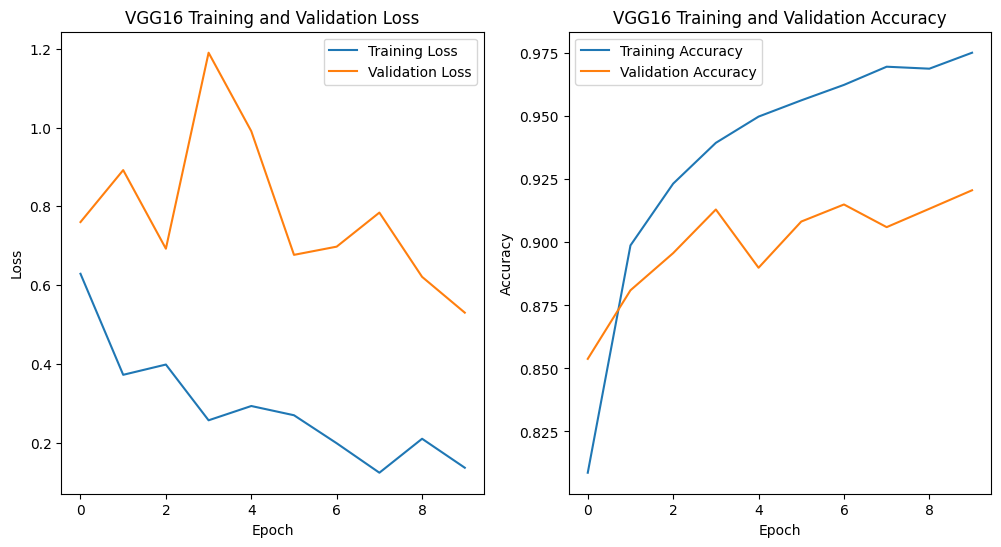

In [10]:
def plot_history1(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('VGG16 Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('VGG16 Training and Validation Accuracy')
    plt.legend()

    plt.show()

plot_history1(vgg_history)